In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Reading Dataset

In [2]:
Dataset_CVD = pd.read_excel("data.xlsx")

In [3]:
Dataset_CVD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
Dataset_CVD.shape

(303, 14)

In [5]:
Dataset_CVD.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
Dataset_CVD.info()
Dataset_CVD.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

# This dataset has 303 rows and 14 columns, there is no missing values and duplicated values in the data set

In [7]:
# Statitical Summary
Dataset_CVD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


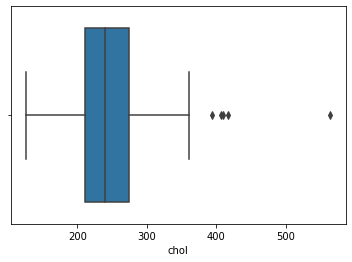

In [7]:
sns.boxplot(x="chol", data=Dataset_CVD)



In [8]:
# outlier treatment from intructor Venkanna
def outlier(column):
    sorted(column)
    Q1, Q3= np.percentile(column, [25,75])
    IQR= Q3-Q1
    lower_range= Q1- (IQR*1.5)
    upper_range= Q3+ (IQR*1.5)
    return lower_range, upper_range

In [9]:
l,u = outlier(Dataset_CVD.chol)

In [10]:
l

115.75

In [11]:
u

369.75

In [12]:
Dataset_CVD[(Dataset_CVD.chol < l ) | (Dataset_CVD.chol > u )]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [13]:
# variable "chol" has outliers, so removing outliers.
Dataset_CVD.drop(Dataset_CVD[(Dataset_CVD.chol < l ) | (Dataset_CVD.chol > u )].index, inplace= True)
Dataset_CVD.shape


(298, 14)

90.0 170.0


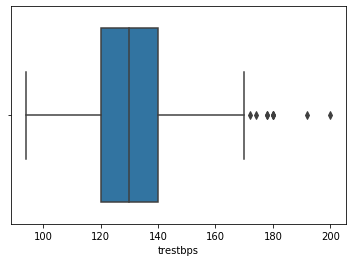

In [14]:
sns.boxplot(x="trestbps", data=Dataset_CVD)


l,u = outlier(Dataset_CVD.trestbps)

print(l, u)

In [15]:
Dataset_CVD[(Dataset_CVD.trestbps < l ) | (Dataset_CVD.trestbps > u )]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [16]:
Dataset_CVD.drop(Dataset_CVD[(Dataset_CVD.trestbps < l ) | (Dataset_CVD.trestbps > u )].index, inplace= True)
Dataset_CVD.shape



(289, 14)

78.0 222.0


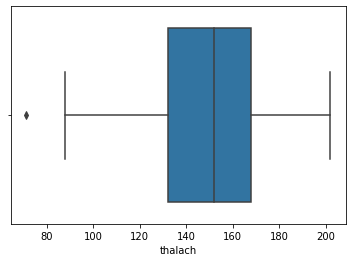

In [17]:
sns.boxplot(x="thalach", data=Dataset_CVD)


l,u = outlier(Dataset_CVD.thalach)

print(l,u)

In [18]:
Dataset_CVD.drop(Dataset_CVD[(Dataset_CVD.thalach < l ) | (Dataset_CVD.thalach > u )].index, inplace= True)
Dataset_CVD.shape




(288, 14)

4.0

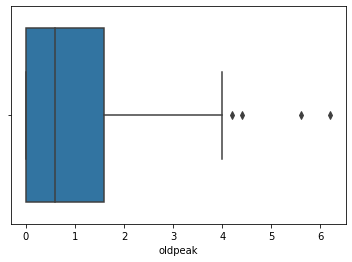

In [19]:
sns.boxplot(x="oldpeak", data=Dataset_CVD)


l,u = outlier(Dataset_CVD.oldpeak)

u

In [20]:
Dataset_CVD.drop(Dataset_CVD[(Dataset_CVD.oldpeak < l ) | (Dataset_CVD.oldpeak > u )].index, inplace= True)
Dataset_CVD.shape




(284, 14)

In [21]:
Dataset_CVD.reset_index

<bound method DataFrame.reset_index of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0   

In [22]:
# Writing the cleaned data to CVS file for Tableau Dashboard.
Dataset_CVD.to_excel("Data_cleaned.xlsx", index= False)

# Categorical Variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.328000,0.864000,0.504000,131.88000,247.60800,0.152000,0.424000,139.200000,0.544000,1.45200,1.208000,1.136000,2.536000
1,52.157233,0.572327,1.371069,128.36478,237.72956,0.132075,0.603774,158.566038,0.138365,0.55283,1.603774,0.371069,2.106918


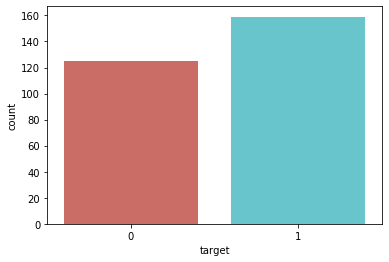

In [35]:
sns.countplot(x= "target", data=Dataset_CVD, palette= 'hls');

Dataset_CVD.groupby("target").mean()


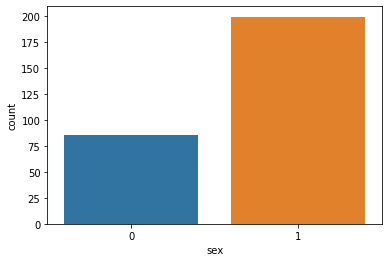

In [36]:
sns.countplot(x= "sex", data=Dataset_CVD);
# more male participants than female.


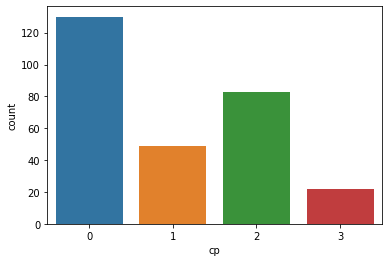

In [37]:
sns.countplot(x= "cp", data=Dataset_CVD);


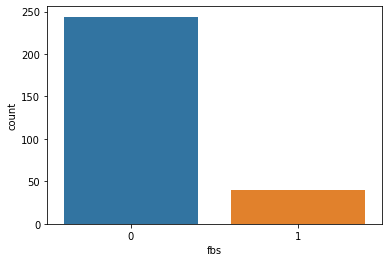

In [38]:
sns.countplot(x= "fbs", data=Dataset_CVD);


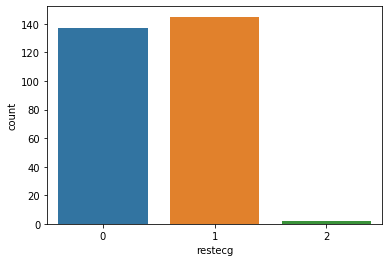

In [39]:
sns.countplot(x= "restecg", data=Dataset_CVD);


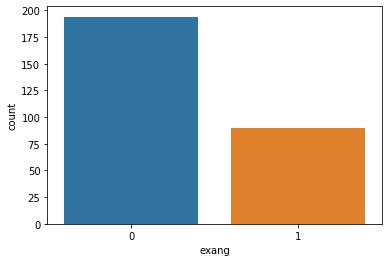

In [40]:
sns.countplot(x= "exang", data=Dataset_CVD);



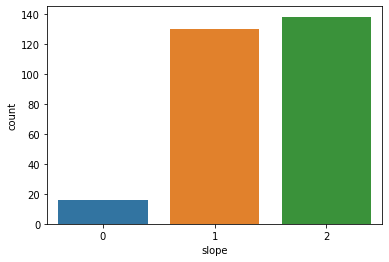

In [41]:
sns.countplot(x= "slope", data=Dataset_CVD);



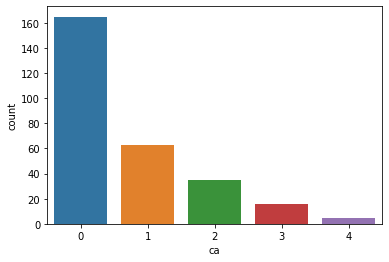

In [42]:
sns.countplot(x= "ca", data=Dataset_CVD);



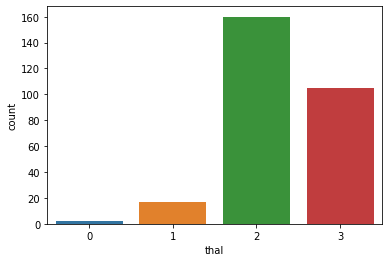

In [43]:
sns.countplot(x= "thal", data=Dataset_CVD);



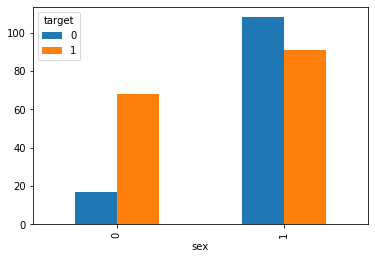

In [44]:
pd.crosstab(Dataset_CVD.sex, Dataset_CVD.target).plot(kind='bar')

In [45]:
# Male are suffering more from Cardiovascular disease (CVD) than female. female= 0, male = 1. 
# We can not really conclude anything since total female in the data is less than male.

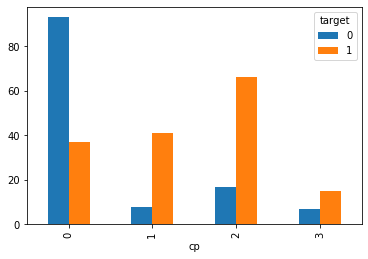

In [46]:
pd.crosstab(Dataset_CVD.cp, Dataset_CVD.target).plot(kind='bar')

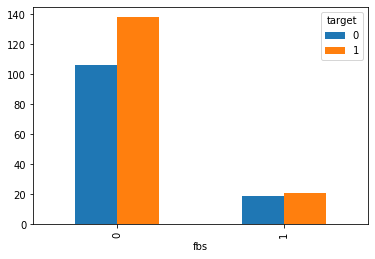

In [47]:
pd.crosstab(Dataset_CVD.fbs, Dataset_CVD.target).plot(kind='bar')

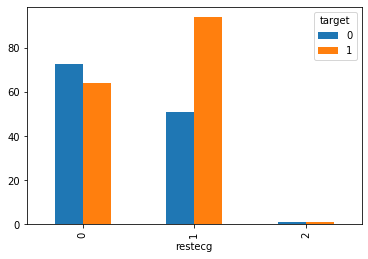

In [48]:
pd.crosstab(Dataset_CVD.restecg, Dataset_CVD.target).plot(kind='bar')

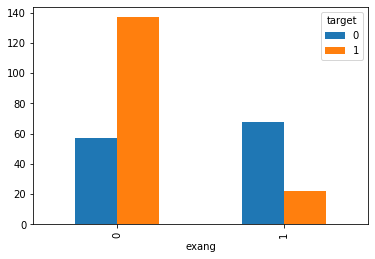

In [49]:
#sns.countplot(x= "target", hue="exang", data=Dataset_CVD);
pd.crosstab(Dataset_CVD.exang, Dataset_CVD.target).plot(kind='bar')
# Most of the CVD are  not due to excercise induced agina. 

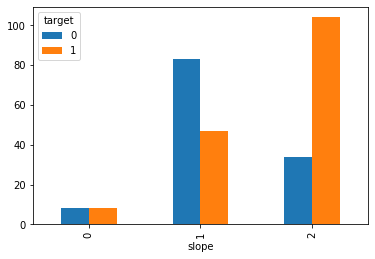

In [50]:
pd.crosstab(Dataset_CVD.slope, Dataset_CVD.target).plot(kind='bar')

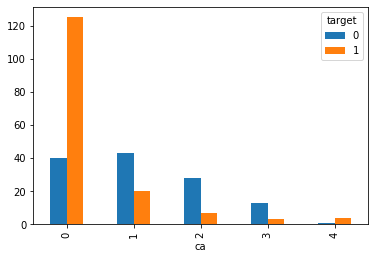

In [51]:
#sns.countplot(x= "target", hue="ca", data=Dataset_CVD);
pd.crosstab(Dataset_CVD.ca, Dataset_CVD.target).plot(kind='bar')

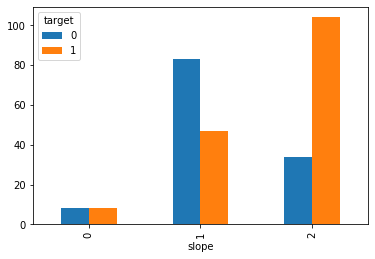

In [52]:
#sns.countplot(y= "target", hue="slope", data=Dataset_CVD);
pd.crosstab(Dataset_CVD.slope, Dataset_CVD.target).plot(kind='bar')

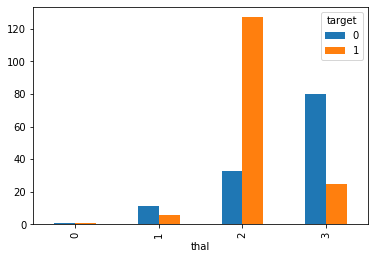

In [53]:
#sns.countplot(y= "target", hue="thal", data=Dataset_CVD);
pd.crosstab(Dataset_CVD.thal, Dataset_CVD.target).plot(kind='bar')

In [23]:
# filtering patients who had heart attack, target= 1 and who don't target = 0. 
CVD_target1= Dataset_CVD[Dataset_CVD.target==1]
CVD_target0= Dataset_CVD[Dataset_CVD.target==0]




Text(0.5, 0, 'age')

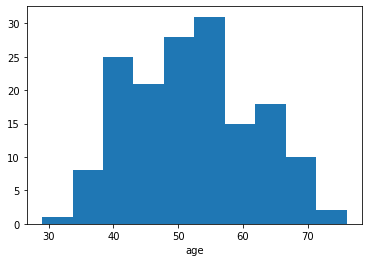

In [55]:
type(CVD_target1.age) 
age_np= CVD_target1["age"].values
plt.hist(age_np)
plt.xlabel("age")

In [56]:
# Age between 45-55 are more prone to have CVD. Age less than 40 and greater than 65 have less CVD.

(array([ 5., 11., 15., 33., 35., 21., 19., 12.,  7.,  1.]),
 array([ 94. , 101.6, 109.2, 116.8, 124.4, 132. , 139.6, 147.2, 154.8,
        162.4, 170. ]),
 <a list of 10 Patch objects>)

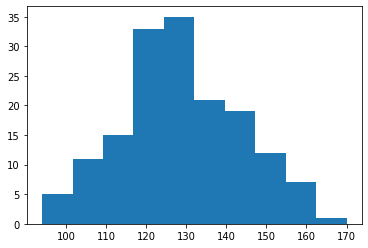

In [57]:
trestbps_np= CVD_target1["trestbps"].values
plt.hist(trestbps_np)

In [58]:
# We can not detect heart attack based on anomalies in resting blood pressure of patient. 
# patients blood pressure between with 120-140 have more heart attacks, 
# but blood pressure greater than 140 have less heart attacks. We can not conclude anythings.

(array([ 2.,  5.,  8.,  8., 17., 31., 39., 34., 12.,  3.]),
 array([ 96. , 106.6, 117.2, 127.8, 138.4, 149. , 159.6, 170.2, 180.8,
        191.4, 202. ]),
 <a list of 10 Patch objects>)

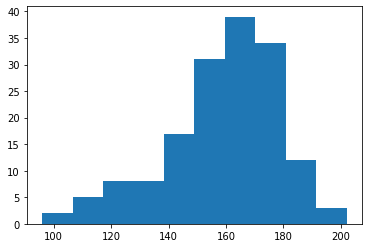

In [59]:
thalach_np= CVD_target1["thalach"].values
plt.hist(thalach_np)
# patients having CVD tends to have higher heart rate than others. 

(array([ 5.,  6., 12., 11., 18., 21., 14., 22.,  9.,  7.]),
 array([ 88. ,  97.4, 106.8, 116.2, 125.6, 135. , 144.4, 153.8, 163.2,
        172.6, 182. ]),
 <a list of 10 Patch objects>)

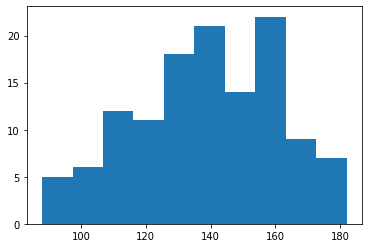

In [60]:
# heart rate of people not having CVD
thalach_np= CVD_target0["thalach"].values
plt.hist(thalach_np)

(array([ 3.,  3., 16., 35., 36., 29., 14., 15.,  4.,  4.]),
 array([126. , 149.4, 172.8, 196.2, 219.6, 243. , 266.4, 289.8, 313.2,
        336.6, 360. ]),
 <a list of 10 Patch objects>)

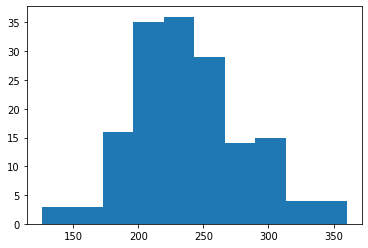

In [61]:
chol_np= CVD_target1["chol"].values
plt.hist(chol_np)

(array([ 2.,  5., 11., 18., 20., 24., 20., 12.,  9.,  4.]),
 array([131. , 153.2, 175.4, 197.6, 219.8, 242. , 264.2, 286.4, 308.6,
        330.8, 353. ]),
 <a list of 10 Patch objects>)

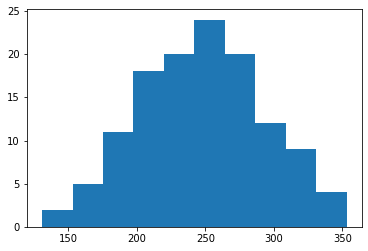

In [24]:
chol_np= CVD_target0["chol"].values
plt.hist(chol_np)

(array([30.,  6., 26.,  8., 12., 14., 13.,  6.,  4.,  6.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

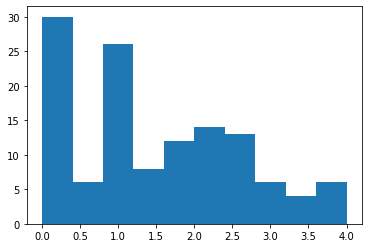

In [454]:
oldpeak_np= CVD_target0["oldpeak"].values
plt.hist(oldpeak_np)

In [455]:
# Data shows that people having CVD seem to have less cholesterol, we can not conclude anything at this point.

In [456]:
# composition of patients w.r.t gender
gender= Dataset_CVD["sex"].value_counts()
gender

1    199
0     85
Name: sex, dtype: int64

In [457]:

pie_list= [(gender[1]/(gender[1]+gender[0]))*100,(gender[0]/(gender[1]+gender[0]))*100]
pie_labels= ["Male", "Female"]
pie_list



[70.07042253521126, 29.929577464788732]

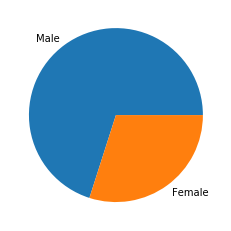

In [458]:
plt.pie(pie_list,labels=pie_labels);

Text(0.5, 0, 'chol')

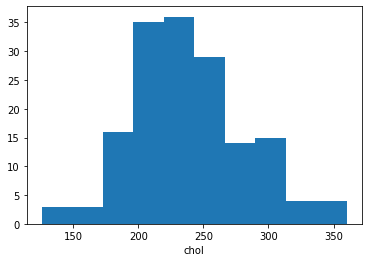

In [64]:
# Relatipnship between cholesterol level and target variable
chol_np= CVD_target1["chol"].values
plt.hist(chol_np)
plt.xlabel("chol")

Text(0.5, 0, 'chol')

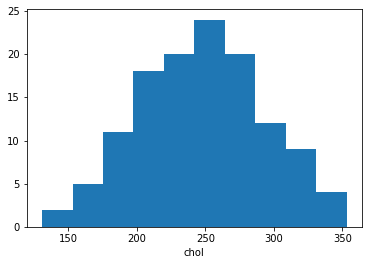

In [65]:
chol_np= CVD_target0["chol"].values
plt.hist(chol_np)
plt.xlabel("chol")

In [461]:
# people with cholesterol level between 150-250 more likely to have heart attack.

In [462]:
CVD_target1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.165238,0.027252,0.266056,0.181149,0.156060,-0.059577,-0.533282,0.041360,0.155746,-0.097908,0.126478,0.064329,NaN
sex,-0.165238,1.000000,0.016634,0.029594,-0.181409,0.149479,0.001434,0.209604,0.088685,0.022482,0.023040,0.062697,0.230143,NaN
cp,0.027252,0.016634,1.000000,0.200264,-0.059130,0.220997,-0.061501,0.069931,-0.080503,0.171592,-0.110197,0.101961,0.010110,NaN
trestbps,0.266056,0.029594,0.200264,1.000000,0.096604,0.114729,-0.118217,0.048157,-0.087750,0.134602,0.015861,0.078171,-0.072011,NaN
chol,0.181149,-0.181409,-0.059130,0.096604,1.000000,-0.039020,-0.151077,0.025211,-0.008401,-0.027799,0.118608,-0.021247,0.033440,NaN
fbs,0.156060,0.149479,0.220997,0.114729,-0.039020,1.000000,-0.062163,-0.033340,-0.048724,0.007386,-0.053508,0.091072,0.071351,NaN
restecg,-0.059577,0.001434,-0.061501,-0.118217,-0.151077,-0.062163,1.000000,0.026218,-0.119170,-0.035530,0.108306,0.136948,0.129930,NaN
thalach,-0.533282,0.209604,0.069931,0.048157,0.025211,-0.033340,0.026218,1.000000,-0.175663,-0.177260,0.220156,-0.044261,0.046306,NaN
exang,0.041360,0.088685,-0.080503,-0.087750,-0.008401,-0.048724,-0.119170,-0.175663,1.000000,0.068238,-0.071333,-0.067144,0.105574,NaN
oldpeak,0.155746,0.022482,0.171592,0.134602,-0.027799,0.007386,-0.035530,-0.177260,0.068238,1.000000,-0.432120,-0.066355,-0.048945,NaN


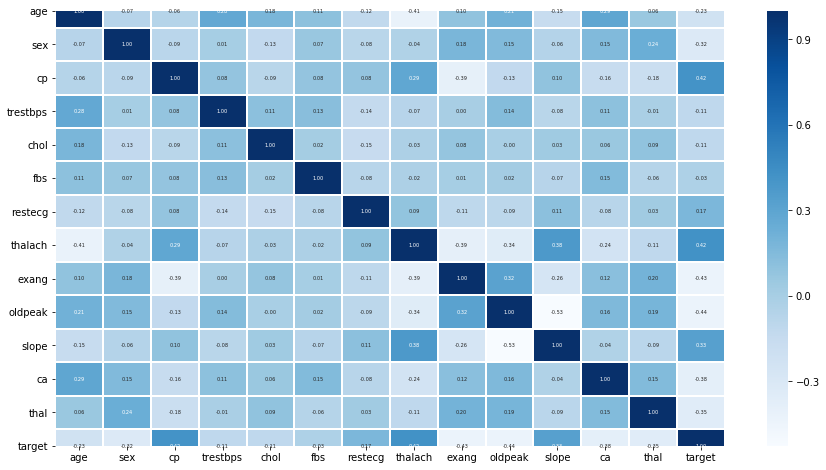

In [463]:

#relationship between variables
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(Dataset_CVD.corr(), annot= True, annot_kws= {'size' : 5},
           cmap = 'Blues', fmt = '.2f', linewidths= 1, linecolor='white')

In [464]:
# Thalasemia is not a major cause of CVD, since it does not show strong co-relation with "target" variable. Variables 
# "ca", "oldpeak", "exang", "fbs","chol", "trestbps" have comparativley strong co-realtion with target variable, 
# could have significant role on CVD.

In [465]:
Dataset_CVD.columns
Dataset_CVD.shape

(284, 14)

In [466]:
Dataset_X= Dataset_CVD.drop(columns= "target")


In [467]:
type(Dataset_X)
Dataset_X_numpy= Dataset_X.to_numpy()
Dataset_X.shape


(284, 13)

In [468]:
Dataset_X_numpy.size

3692

In [469]:
# adding another column on 1.0, for b0.
Dataset_X_numpy= sm.add_constant(Dataset_X_numpy)

Dataset_X_numpy.shape

(284, 14)

In [470]:
Dataset_y= Dataset_CVD.target

In [471]:
Dataset_y
type(Dataset_y)
Dataset_y.shape

(284,)

In [472]:
Dataset_y_numpy= Dataset_y.to_numpy()

In [473]:
Dataset_y_numpy
type(Dataset_y_numpy)
Dataset_y_numpy.shape


(284,)

In [474]:
logit_model= sm.Logit(Dataset_y_numpy, Dataset_X_numpy)

In [475]:
result= logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.348480
         Iterations 7


In [476]:
result.params

array([ 4.59396162, -0.0068664 , -1.77112602,  0.82043613, -0.01889087,
       -0.00845241,  0.04836552,  0.55032837,  0.02325023, -0.85951454,
       -0.67308787,  0.56697478, -0.74824265, -0.96059562])

In [477]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:                          Logit   Df Residuals:                      270
Method:                           MLE   Df Model:                           13
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.4920
Time:                        10:43:01   Log-Likelihood:                -98.968
converged:                       True   LL-Null:                       -194.81
Covariance Type:            nonrobust   LLR p-value:                 6.913e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5940      2.869      1.602      0.109      -1.028      10.216
x1            -0.0069      0.024     -0.291      0.771      -0.053       0.039
x2            -1.7711      0.483     -3.667      0.000      -2.718      -0.825
x3             0.8204      0.190      4.308      0.000       0.447       1.194
x4            -0.0189      0.012     -1.541      0.123      -0.043       0.005
x5            -0.0085      0.005     -1.803      0.071      -0.018       0.001
x6             0.0484      0.557      0.087      0.931      -1.044       1.141
x7             0.5503      0.363      1.516      0.129      -0.161       1.262
x8             0.0233      0.011      2.110      0.035       0.002       0.045
x9            -0.8595      0.427     -2.013      0.044      -1.696      -0.023
x10           -0.6731      0.227     -2.966      0.003      -1.118      -0.228
x11            0.5670      0.357      1.589      0.112      -0.132       1.266
x12           -0.7482      0.199     -3.766      0.000      -1.138      -0.359
x13           -0.9606      0.304     -3.164      0.002      -1.556      -0.366
==============================================================================
"""

In [478]:
# Removing variable with highest p- value and p > 0.05. removing x6 first.
#confusion_matrix(Dataset_y_numpy,result.predict(Dataset_X_numpy))
#cm = confusion_matrix(y, result.predict(Dataset_X_numpy))
result.predict(Dataset_X_numpy)

array([0.76317667, 0.56509291, 0.96166288, 0.9137445 , 0.77434769,
       0.81643411, 0.77350392, 0.84237977, 0.92759861, 0.61363552,
       0.98175179, 0.87409781, 0.71217763, 0.97781554, 0.97251484,
       0.988547  , 0.80024832, 0.5830845 , 0.92290361, 0.38505319,
       0.9263883 , 0.86773831, 0.51360853, 0.86079765, 0.75317526,
       0.86030751, 0.94133005, 0.69685252, 0.98783123, 0.59912643,
       0.93201492, 0.48803037, 0.58448007, 0.85035744, 0.98910223,
       0.5768468 , 0.96275871, 0.87081492, 0.80107066, 0.81506117,
       0.11911213, 0.77628104, 0.90739818, 0.86986769, 0.9492301 ,
       0.90039054, 0.99565722, 0.92943439, 0.97354543, 0.36295849,
       0.10005935, 0.99617269, 0.9870519 , 0.76955812, 0.86405994,
       0.83994534, 0.98945522, 0.79975552, 0.95096047, 0.74077566,
       0.99423256, 0.91063234, 0.93904273, 0.96275251, 0.76882243,
       0.95177511, 0.94932608, 0.97371441, 0.61751934, 0.76751844,
       0.95981883, 0.5743532 , 0.99127078, 0.86058089, 0.65012

In [479]:
(result.predict(Dataset_X_numpy) >= 0.5).astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [480]:
result.pred_table()

array([[ 98.,  27.],
       [ 12., 147.]])

In [481]:
# dropping x6, "fbs"
Dataset_Nofbs= Dataset_X.drop(columns= "fbs")


In [482]:
Dataset_Nofbs_numpy= Dataset_Nofbs.to_numpy()
Dataset_Nofbs_numpy= sm.add_constant(Dataset_Nofbs_numpy)
Dataset_Nofbs_numpy.shape

(284, 13)

In [483]:
logit_model= sm.Logit(Dataset_y_numpy, Dataset_Nofbs_numpy)

In [484]:
result= logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.348493
         Iterations 7


In [485]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:                          Logit   Df Residuals:                      271
Method:                           MLE   Df Model:                           12
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.4920
Time:                        10:43:01   Log-Likelihood:                -98.972
converged:                       True   LL-Null:                       -194.81
Covariance Type:            nonrobust   LLR p-value:                 1.691e-34
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5829      2.865      1.599      0.110      -1.033      10.199
x1            -0.0067      0.023     -0.284      0.776      -0.053       0.039
x2            -1.7670      0.481     -3.677      0.000      -2.709      -0.825
x3             0.8230      0.188      4.370      0.000       0.454       1.192
x4            -0.0188      0.012     -1.538      0.124      -0.043       0.005
x5            -0.0084      0.005     -1.801      0.072      -0.018       0.001
x6             0.5496      0.363      1.515      0.130      -0.162       1.261
x7             0.0233      0.011      2.118      0.034       0.002       0.045
x8            -0.8573      0.426     -2.011      0.044      -1.693      -0.022
x9            -0.6750      0.226     -2.987      0.003      -1.118      -0.232
x10            0.5623      0.353      1.595      0.111      -0.129       1.253
x11           -0.7461      0.197     -3.784      0.000      -1.133      -0.360
x12           -0.9657      0.298     -3.244      0.001      -1.549      -0.382
==============================================================================
"""

In [486]:
result.pred_table()

array([[ 97.,  28.],
       [ 12., 147.]])

In [487]:
# dropping X1 , "age".
Dataset_NofbsAge= Dataset_Nofbs.drop(columns= "age")



In [488]:
Dataset_NofbsAge_numpy= Dataset_NofbsAge.to_numpy()
Dataset_NofbsAge_numpy= sm.add_constant(Dataset_NofbsAge_numpy)
Dataset_NofbsAge_numpy.shape

(284, 12)

In [489]:
logit_model= sm.Logit(Dataset_y_numpy, Dataset_NofbsAge_numpy)

In [490]:
result= logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.348636
         Iterations 7


In [491]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:                          Logit   Df Residuals:                      272
Method:                           MLE   Df Model:                           11
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.4918
Time:                        10:43:02   Log-Likelihood:                -99.012
converged:                       True   LL-Null:                       -194.81
Covariance Type:            nonrobust   LLR p-value:                 4.093e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1701      2.467      1.691      0.091      -0.664       9.004
x1            -1.7541      0.479     -3.665      0.000      -2.692      -0.816
x2             0.8210      0.188      4.365      0.000       0.452       1.190
x3            -0.0196      0.012     -1.641      0.101      -0.043       0.004
x4            -0.0086      0.005     -1.844      0.065      -0.018       0.001
x5             0.5573      0.362      1.539      0.124      -0.152       1.267
x6             0.0245      0.010      2.403      0.016       0.005       0.044
x7            -0.8527      0.426     -2.001      0.045      -1.688      -0.018
x8            -0.6718      0.225     -2.982      0.003      -1.113      -0.230
x9             0.5621      0.352      1.595      0.111      -0.128       1.253
x10           -0.7533      0.195     -3.868      0.000      -1.135      -0.372
x11           -0.9669      0.298     -3.242      0.001      -1.551      -0.382
==============================================================================
"""

In [492]:
cm=result.pred_table()

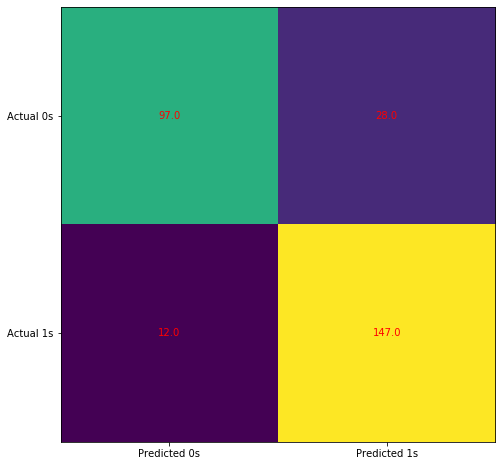

In [493]:
# copied from https://realpython.com/logistic-regression-python/
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [494]:
Dataset_NofbsAgeTrestbps= Dataset_NofbsAge.drop(columns="trestbps")

In [495]:
Dataset_NofbsAgeTrestbps_numpy= Dataset_NofbsAgeTrestbps.to_numpy()
Dataset_NofbsAgeTrestbps_numpy= sm.add_constant(Dataset_NofbsAgeTrestbps_numpy)
Dataset_NofbsAgeTrestbps_numpy.shape

(284, 11)

In [496]:
logit_model= sm.Logit(Dataset_y_numpy, Dataset_NofbsAgeTrestbps_numpy)

In [497]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.353472
         Iterations 7


In [498]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:                          Logit   Df Residuals:                      273
Method:                           MLE   Df Model:                           10
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.4847
Time:                        10:43:02   Log-Likelihood:                -100.39
converged:                       True   LL-Null:                       -194.81
Covariance Type:            nonrobust   LLR p-value:                 3.384e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7282      1.922      0.899      0.368      -2.038       5.494
x1            -1.6924      0.467     -3.625      0.000      -2.607      -0.777
x2             0.7685      0.183      4.199      0.000       0.410       1.127
x3            -0.0088      0.005     -1.909      0.056      -0.018       0.000
x4             0.6008      0.358      1.680      0.093      -0.100       1.302
x5             0.0238      0.010      2.386      0.017       0.004       0.043
x6            -0.8429      0.418     -2.016      0.044      -1.662      -0.023
x7            -0.6953      0.224     -3.111      0.002      -1.133      -0.257
x8             0.5364      0.350      1.533      0.125      -0.150       1.222
x9            -0.7579      0.193     -3.925      0.000      -1.136      -0.379
x10           -0.9253      0.292     -3.164      0.002      -1.498      -0.352
==============================================================================
"""

In [499]:
Dataset_NofbsAgeTrestbps

,sex,cp,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,3,233,0,150,0,2.3,0,0,1
1,1,2,250,1,187,0,3.5,0,0,2
2,0,1,204,0,172,0,1.4,2,0,2
3,1,1,236,1,178,0,0.8,2,0,2
4,0,0,354,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...
298,0,0,241,1,123,1,0.2,1,0,3
299,1,3,264,1,132,0,1.2,1,0,3
300,1,0,193,1,141,0,3.4,1,2,3
301,1,0,131,1,115,1,1.2,1,1,3


In [500]:
cm= result.pred_table()

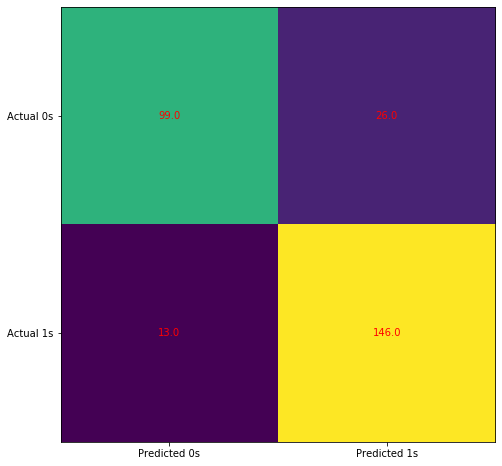

In [501]:
# copied from https://realpython.com/logistic-regression-python/
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [502]:
Dataset_NofbsAgeTrestbpsRestecg= Dataset_NofbsAgeTrestbps.drop(columns="restecg")

In [503]:
Dataset_NofbsAgeTrestbpsRestecg_numpy= Dataset_NofbsAgeTrestbpsRestecg.to_numpy()
Dataset_NofbsAgeTrestbpsRestecg_numpy= sm.add_constant(Dataset_NofbsAgeTrestbpsRestecg_numpy)
Dataset_NofbsAgeTrestbpsRestecg_numpy.shape

(284, 10)

In [504]:
logit_model= sm.Logit(Dataset_y_numpy, Dataset_NofbsAgeTrestbpsRestecg_numpy)

In [505]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.358508
         Iterations 7


In [506]:
result.pred_table()

array([[ 97.,  28.],
       [ 14., 145.]])

In [507]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:                          Logit   Df Residuals:                      274
Method:                           MLE   Df Model:                            9
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.4774
Time:                        10:43:02   Log-Likelihood:                -101.82
converged:                       True   LL-Null:                       -194.81
Covariance Type:            nonrobust   LLR p-value:                 2.832e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8993      1.867      1.017      0.309      -1.759       5.558
x1            -1.7282      0.464     -3.723      0.000      -2.638      -0.819
x2             0.7548      0.182      4.157      0.000       0.399       1.111
x3            -0.0098      0.005     -2.167      0.030      -0.019      -0.001
x4             0.0252      0.010      2.546      0.011       0.006       0.045
x5            -0.8198      0.416     -1.972      0.049      -1.634      -0.005
x6            -0.6706      0.218     -3.071      0.002      -1.099      -0.243
x7             0.5665      0.345      1.640      0.101      -0.111       1.244
x8            -0.7508      0.190     -3.945      0.000      -1.124      -0.378
x9            -0.8606      0.284     -3.025      0.002      -1.418      -0.303
==============================================================================
"""

In [508]:
Dataset_NofbsAgeTrestbpsRestecg

,sex,cp,chol,thalach,exang,oldpeak,slope,ca,thal
0,1,3,233,150,0,2.3,0,0,1
1,1,2,250,187,0,3.5,0,0,2
2,0,1,204,172,0,1.4,2,0,2
3,1,1,236,178,0,0.8,2,0,2
4,0,0,354,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...
298,0,0,241,123,1,0.2,1,0,3
299,1,3,264,132,0,1.2,1,0,3
300,1,0,193,141,0,3.4,1,2,3
301,1,0,131,115,1,1.2,1,1,3


In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm= result.pred_table())
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [509]:
Dataset_NofbsAgeTrestbpsRestecgSlope= Dataset_NofbsAgeTrestbpsRestecg.drop(columns="slope")

In [510]:
Dataset_NofbsAgeTrestbpsRestecgSlope_numpy= Dataset_NofbsAgeTrestbpsRestecgSlope.to_numpy()
Dataset_NofbsAgeTrestbpsRestecgSlope_numpy= sm.add_constant(Dataset_NofbsAgeTrestbpsRestecgSlope_numpy)
Dataset_NofbsAgeTrestbpsRestecgSlope_numpy.shape

(284, 9)

In [511]:
logit_model= sm.Logit(Dataset_y_numpy, Dataset_NofbsAgeTrestbpsRestecgSlope_numpy)

In [512]:
result= logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.363166
         Iterations 7


In [513]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  284
Model:                          Logit   Df Residuals:                      275
Method:                           MLE   Df Model:                            8
Date:                Tue, 17 Aug 2021   Pseudo R-squ.:                  0.4706
Time:                        10:43:03   Log-Likelihood:                -103.14
converged:                       True   LL-Null:                       -194.81
Covariance Type:            nonrobust   LLR p-value:                 2.038e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3287      1.849      1.260      0.208      -1.294       5.952
x1            -1.6835      0.457     -3.681      0.000      -2.580      -0.787
x2             0.7331      0.179      4.097      0.000       0.382       1.084
x3            -0.0096      0.004     -2.161      0.031      -0.018      -0.001
x4             0.0281      0.010      2.902      0.004       0.009       0.047
x5            -0.8505      0.413     -2.060      0.039      -1.660      -0.041
x6            -0.8349      0.197     -4.242      0.000      -1.221      -0.449
x7            -0.7010      0.183     -3.833      0.000      -1.059      -0.343
x8            -0.8555      0.285     -3.000      0.003      -1.414      -0.297
==============================================================================
"""

In [514]:
result.pred_table()

array([[ 99.,  26.],
       [ 16., 143.]])

# Decision Tree and Random Forest

In [43]:
# dropping the target variable.

feature= Dataset_CVD.drop("target", axis=1)

In [44]:
feature

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [45]:
# training and testing dataset
X= feature.values
Y= Dataset_CVD['target'].values

In [46]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [47]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)

In [49]:
len(X_train)

227

Text(0, 0.5, 'Accuracy')

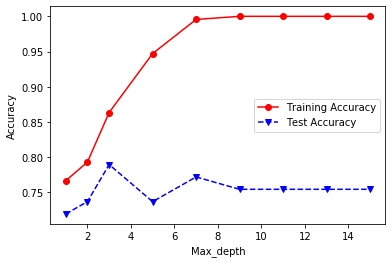

In [50]:
from sklearn.tree import DecisionTreeClassifier

#from sklearn import tree
from sklearn.metrics import accuracy_score


# First create a list of max_depth

max_depthlist = [1,2, 3, 5,7,9,11,13,15]

# Empty list to store training accuracy
trainAcc = []

# Empty list to store testing accuracy
testAcc = []


for k in max_depthlist:
    
    clf = DecisionTreeClassifier(max_depth=k,random_state=0)
    clf = clf.fit(X_train, Y_train)

    
    # predict the train data
    
    Y_predTrain = clf.predict(X_train)
    
    accuracy_score_train = accuracy_score(Y_train, Y_predTrain)
    
    # add the accuracies in trainAcc list
    
    trainAcc.append(accuracy_score_train)
    
    # predict the test data
    
    Y_predTest = clf.predict(X_test)

    accuracy_score_test = accuracy_score(Y_test, Y_predTest)
    
    testAcc.append(accuracy_score_test)
    
    
    # end of for loop statement

plt.plot(max_depthlist, trainAcc, 'ro-', max_depthlist, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')

In [51]:
tree_diabetes = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_diabetes.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree_diabetes.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree_diabetes.score(X_test, Y_test)))

Accuracy on training set: 0.863
Accuracy on test set: 0.789


In [52]:
# Let's tune the max_depth based on gridserachCV

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

# the parameter to be tuned is max_depth

param_grid_depth = {'max_depth':np.arange(1,15)} # get a list of depth parameters

tree = DecisionTreeClassifier(random_state=0)

tree_cv_depth= GridSearchCV(tree,param_grid_depth,cv=10)
# fit GridSearchCV with training data

tree_cv_depth.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             pre_dispatch='2*n_job

In [53]:
tree_cv_depth.best_params_

{'max_depth': 3}

In [54]:
param_grid_split = {'min_samples_split':np.arange(10,50,5)} # get a list of minimum samples split starting with 10 , end 50 and increment with 5

tree = DecisionTreeClassifier(random_state=0)

tree_cv_split= GridSearchCV(tree,param_grid_split,cv=10)

tree_cv_split.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': array([10, 15, 20, 25, 30, 35, 40, 45])},
             pre_dispatch='2*n_jobs', refit=True, 

In [56]:
tree_cv_split.best_params_

{'min_samples_split': 20}

In [57]:
tree_diabetes = DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=0)
tree_diabetes.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree_diabetes.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree_diabetes.score(X_test, Y_test)))

Accuracy on training set: 0.850
Accuracy on test set: 0.789


In [58]:
y_pred =tree_diabetes.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix

# y_test is original y values for test data
#y_pred is the predicted y values for test data
confusion_matrix(Y_test,y_pred)

array([[16,  7],
       [ 5, 29]])

In [60]:
pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,16,7,23
1,5,29,34
All,21,36,57


In [61]:
len(X_test)

57

In [62]:
tree_diabetes.score(X_test,Y_test)

0.7894736842105263

In [63]:
print(classification_report(Y_test,y_pred))



              precision    recall  f1-score   support

           0       0.76      0.70      0.73        23
           1       0.81      0.85      0.83        34

    accuracy                           0.79        57
   macro avg       0.78      0.77      0.78        57
weighted avg       0.79      0.79      0.79        57



In [39]:
featureImpList= []
feature_names=list(Dataset_CVD.columns[0:13])
feature_names

for feat, importance in zip(feature_names, tree_diabetes.feature_importances_):  
    temp = [feat, importance*100]
    featureImpList.append(temp)

# create a dataframe

fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])

# sort the values

fT_df_sorted = fT_df.sort_values('Importance', ascending = False)
print (fT_df_sorted)

     Feature  Importance
2         cp   49.334321
11        ca   21.965225
12      thal   13.906829
9    oldpeak   10.104526
10     slope    3.722012
4       chol    0.967087
0        age    0.000000
1        sex    0.000000
3   trestbps    0.000000
5        fbs    0.000000
6    restecg    0.000000
7    thalach    0.000000
8      exang    0.000000


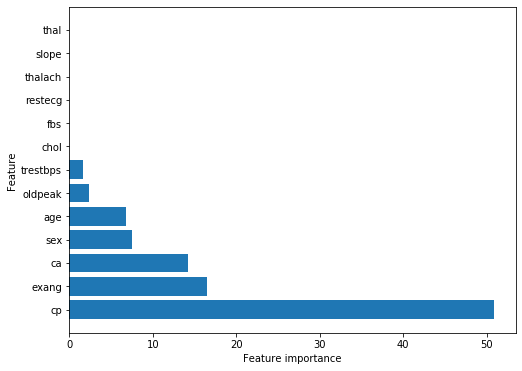

In [31]:
plt.figure(figsize=(8,6))
n_features = len(fT_df_sorted)
plt.barh(range(n_features), fT_df_sorted['Importance'], align='center')
plt.yticks(np.arange(n_features), fT_df_sorted['Feature'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.savefig('feature_importance')

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=3,random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 0.894
Accuracy on test set: 0.825


In [33]:
from sklearn.model_selection import GridSearchCV

# the parameter to be tuned is n_estimators

param_grid_estimator = {'n_estimators':np.arange(100,250,50)} # get a list of depth parameters

forest = RandomForestClassifier(random_state=0)

forest_cv_estimator= GridSearchCV(forest,param_grid_estimator,cv=10)
# fit GridSearchCV with training data

forest_cv_estimator.fit(X_train, Y_train)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [34]:
forest_cv_estimator.best_params_

{'n_estimators': 200}

In [36]:
y_pred_RM =rf.predict(X_test)

In [37]:
pd.crosstab(Y_test, y_pred_RM, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,15,8,23
1,2,32,34
All,17,40,57


In [39]:
featureImpList= []
feature_names=list(Dataset_CVD.columns[0:13])

for feat, importance in zip(feature_names, rf.feature_importances_):  
    temp = [feat, importance*100]
    featureImpList.append(temp)

# create a dataframe

fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])

# sort the values

fT_df_sorted = fT_df.sort_values('Importance', ascending = False)
print (fT_df_sorted)

     Feature  Importance
2         cp   18.417715
12      thal   15.564296
11        ca   14.668408
8      exang   12.633117
7    thalach   10.668613
9    oldpeak    9.220275
10     slope    5.540042
0        age    3.764339
1        sex    3.645637
4       chol    2.797440
3   trestbps    2.037500
6    restecg    0.866414
5        fbs    0.176202


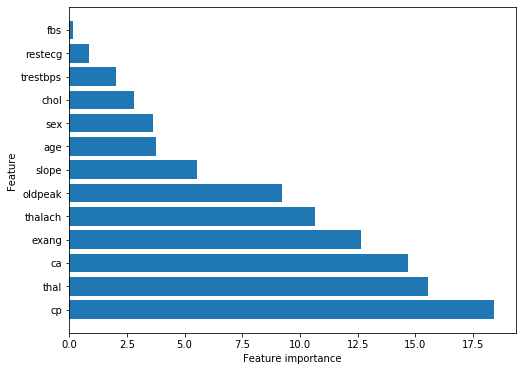

In [40]:
plt.figure(figsize=(8,6))
n_features = len(fT_df_sorted)
plt.barh(range(n_features), fT_df_sorted['Importance'], align='center')
plt.yticks(np.arange(n_features), fT_df_sorted['Feature'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)
plt.savefig('feature_importance')

In [41]:
print(classification_report(Y_test,y_pred_RM))



              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.80      0.94      0.86        34

    accuracy                           0.82        57
   macro avg       0.84      0.80      0.81        57
weighted avg       0.83      0.82      0.82        57

